<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_set_2020/blob/master/BIG_Segmentacao_set_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
# Segmentation: start here......

In [ ]:
# start top

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [ ]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
print(img.shape)

(1200, 1200)


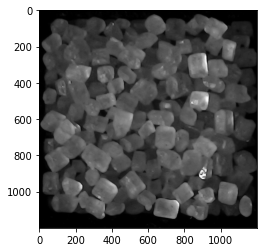

In [ ]:
plt.imshow(img, cmap = "gray")

In [ ]:
Num=50

In [ ]:
#First top

In [ ]:
a=0
b=1200
c=100
d=200

ww=[]
label=[]
SizeWidth=[]  

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
      
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
#2nd top

In [ ]:

Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(50, 28, 28)


In [ ]:
#3th top

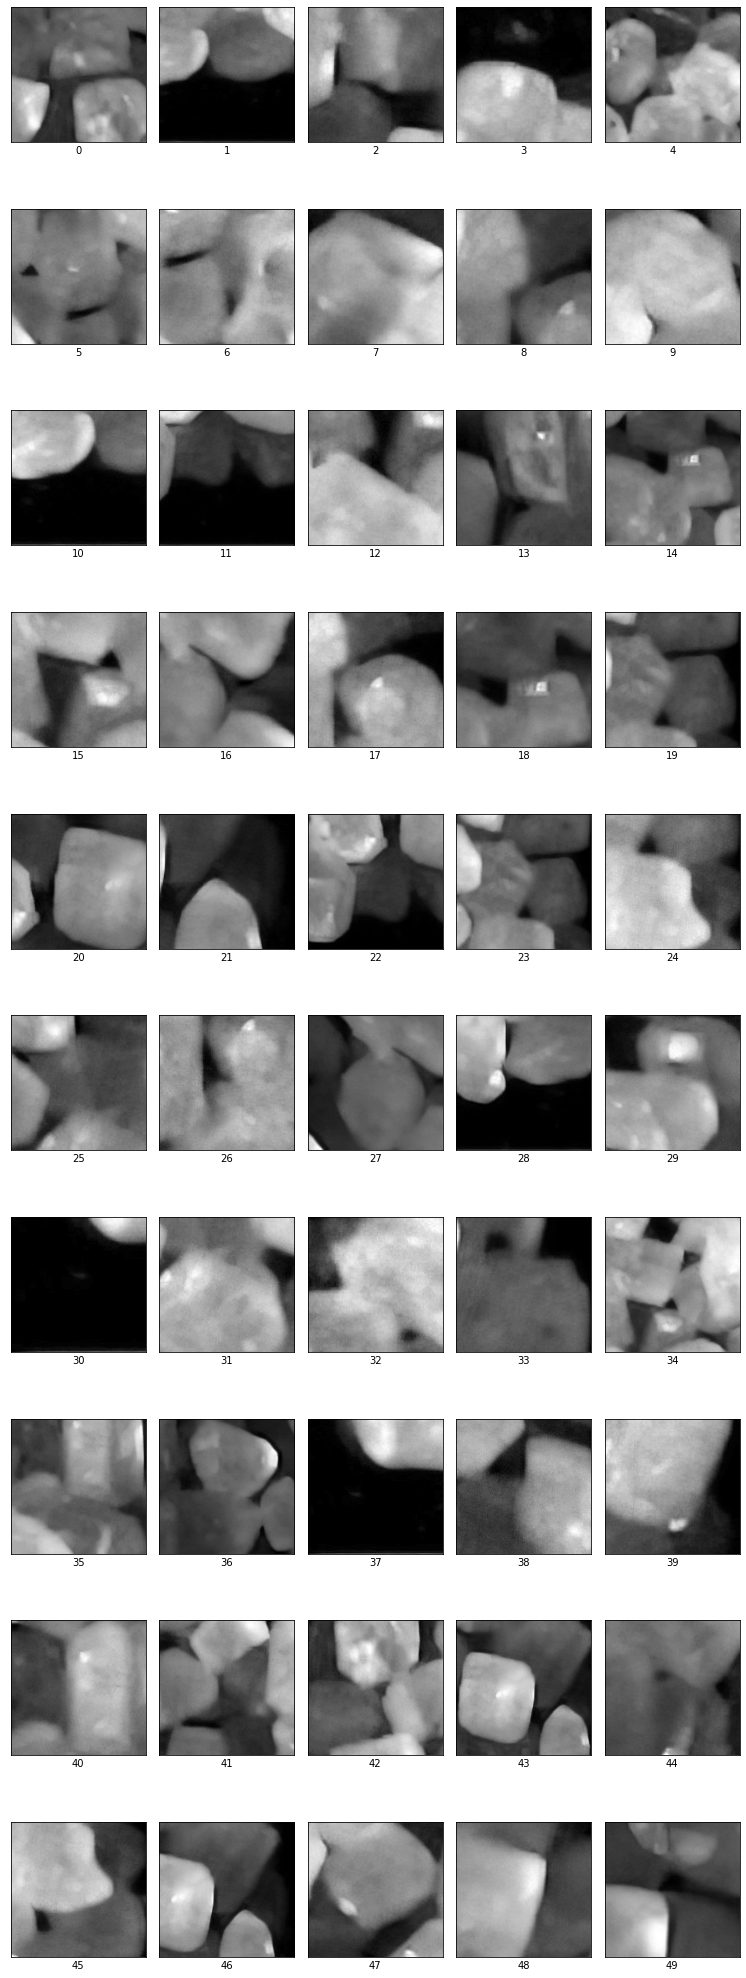

In [ ]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

plt.subplots_adjust(bottom=0.15, right=0.8, top=2,hspace=0.1, wspace=0.1)
  

In [ ]:
#4th top

In [ ]:
Types_top=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  #print('i=',i,'=====')
  #Valor=input('Tipo=')
  Valor='Z'
  Types_top.append(Valor)

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th top

In [ ]:

img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th top

In [ ]:
img28_top=pd.DataFrame(img28_ravel_all)
img28_top.insert(0,"Type",Types_top)
img28_top.insert(0, "Width", SizeWidth) 

In [ ]:
# Start middle

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
#First middle

In [ ]:
a=0
b=1200
c=100
d=200

ww=[]
label=[]
SizeWidth=[]  
for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
print([i+y,j+x])
print([x,y])
print([Size,Width])

[247, 724]
[576, 99]
[1200, 149]


In [ ]:
print(np.array(img).shape)

(1200, 1200)


In [ ]:
#2nd middle

In [ ]:

Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)

(50, 28, 28)


In [ ]:
#3th middle

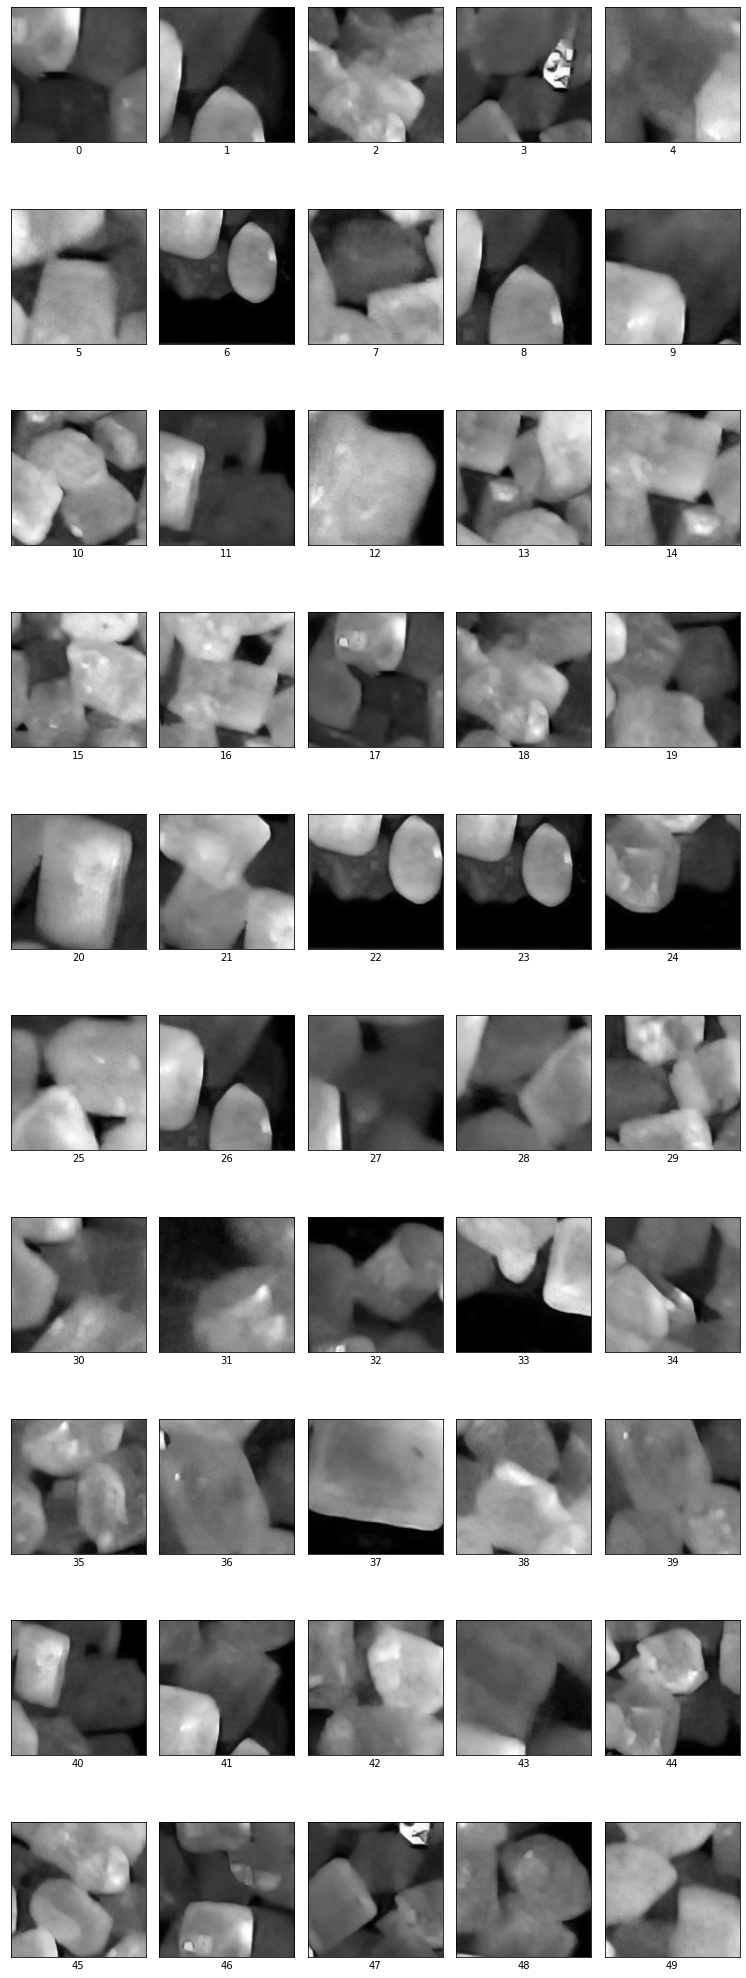

In [ ]:
plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

plt.subplots_adjust(bottom=0.15, right=0.8, top=2,hspace=0.1, wspace=0.1)

In [ ]:
#4th middle

In [ ]:
Types_middle=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  #print('i=',i,'=====')
  Valor='Z'
  Types_middle.append(Valor)

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th middle

In [ ]:

img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th middle

In [ ]:
img28_middle=pd.DataFrame(img28_ravel_all)
img28_middle.insert(0,"Type",Types_middle)
img28_middle.insert(0, "Width", SizeWidth) 

In [ ]:
# start bottom

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
# First bottom

In [ ]:
a=0
b=1200
c=100
d=200

ww=[]
label=[]
SizeWidth=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
# 2nd bottom

In [ ]:

Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)

(50, 28, 28)


In [ ]:
# 3th bottom

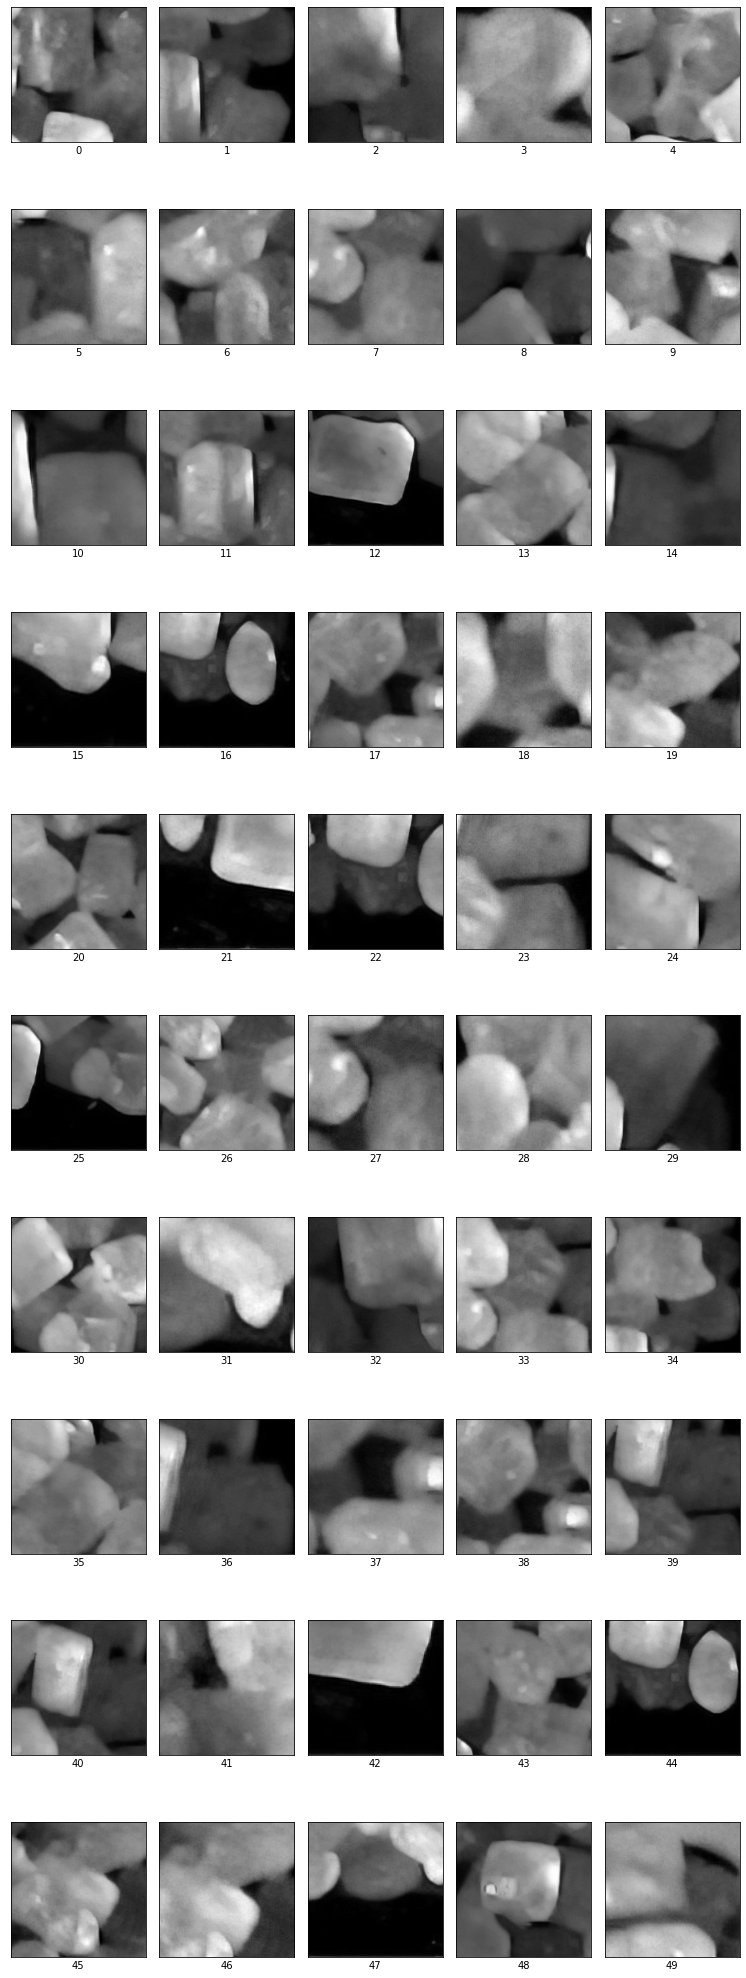

In [ ]:
plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)
  

plt.subplots_adjust(bottom=0.15, right=0.8, top=2,hspace=0.1, wspace=0.1)

In [ ]:
# 4th bottom

In [ ]:
Types_bottom=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  # print('i=',i,'=====')
  Valor='Z'
  Types_bottom.append(Valor)

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th bottom

In [ ]:

img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th bottom

In [ ]:
img28_bottom=pd.DataFrame(img28_ravel_all)
img28_bottom.insert(0,"Type",Types_bottom)
img28_bottom.insert(0, "Width", SizeWidth) 
#print(img28_bottom)

In [ ]:
frames = [img28_top,img28_middle,img28_bottom]
img28_all=pd.concat(frames)
#print(img28_all)

In [ ]:
# found drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
ww[11].shape

(188, 188)

In [ ]:
img28_all.to_csv('img28_all00.csv',float_format="%.5f")
# save in drive
!cp img28_all00.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [ ]:
InputAnn=img28_all[['Type','Width']]
Choice=img28_all[img28_all.Type.isin(['B','G'])]
print(Choice)

Empty DataFrame
Columns: [Width, Type, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, ...]
Index: []

[0 rows x 786 columns]


In [ ]:
X_fake=Choice[['Type','Width']]
print(X_fake)

Empty DataFrame
Columns: [Type, Width]
Index: []
